`TRABAJO DE HABILITACIÓN:`

# ANÁLISIS COMPARATIVO DEL RENDIMIENTO DIVERSOS ALGORITMOS DE APRENDIZAJE AUTOMÁTICO APLICADOS AL RECONOCIMIENTO FACIAL

> **Autor: Ms. Ing. Emerson Maximo Asto Rodriguez**

> Proyecto para optar por plaza regular en la excuela de ingeniería Mecatrónica.


# **1. Librerías a utilizar**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
#
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
#
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
#
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics
#
from keras import layers
from keras import Model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from keras.utils.vis_utils import plot_model
#
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import MobileNetV2
#
import cv2
#
import warnings
warnings.filterwarnings('ignore')

# **2. Lectura de la base de datos**

In [ ]:
data = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:
X = data['data']
y = data['target']
X_im = data['images']

In [ ]:
print("Etiquetas: ", np.unique(y))
print("Rango de valores: [0,1]")
print("Tamaño de muestras: 64x64")

Etiquetas:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Rango de valores: [0,1]
Tamaño de muestras: 64x64


In [ ]:
def mostrar_uno_individuos(images, unique_ids):
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    axarr=axarr.flatten()
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index].reshape(64,64), cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("Individuo_id:{}".format(unique_id))
    plt.suptitle("40 personas que se encuentran en la base de datos")

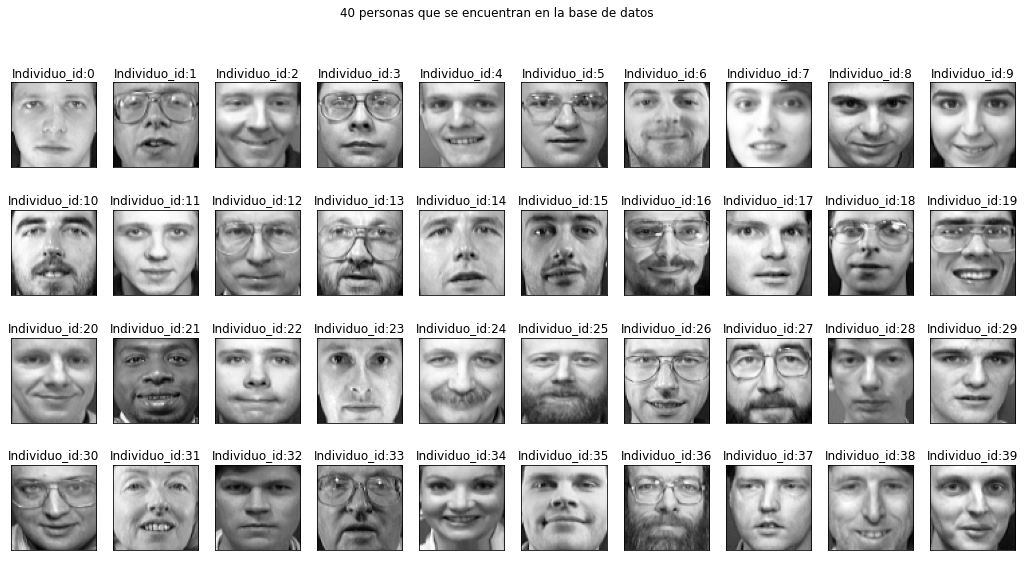

In [ ]:
mostrar_uno_individuos(X, np.unique(y))

In [ ]:
def mostrar_todo_individuos(images, subject_ids):
    cols=10 # 10 imagenes por individuo
    rows=(len(subject_ids)*10)/cols #
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,2*rows))
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index].reshape(64,64), cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("Individuo_id:{}-{}".format(subject_id,j))

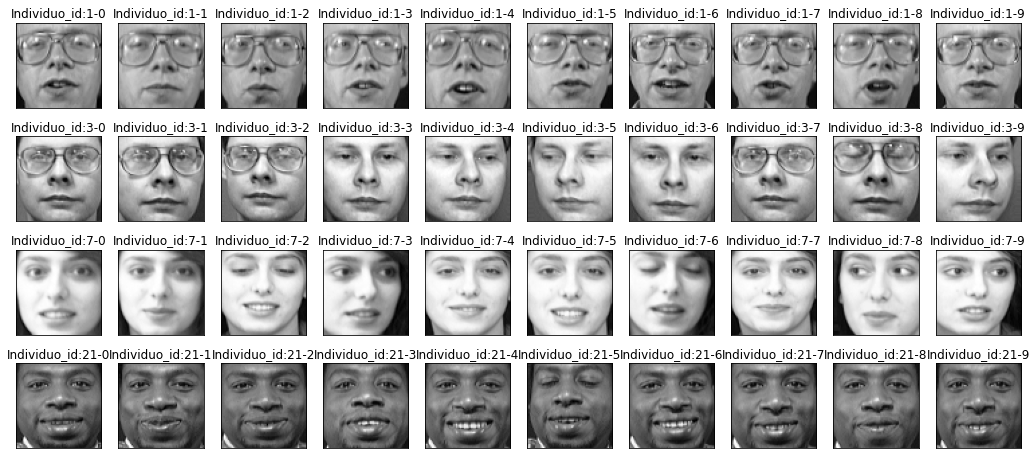

In [ ]:
mostrar_todo_individuos(images=X, subject_ids=[1,3,7,21])

# **3. Implementación de modelos**

## **3.1. Sin extracción de características**

### **3.1.1. ANN**

#### `División de la base de datos`

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("x_train: ",X_train.shape)
print("x_test: ",X_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

x_train:  (320, 4096)
x_test:  (80, 4096)
y_train shape:  (320, 40)
y_test shape:  (80, 40)


#### `Creación del modelo neuronal`



In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=4096, activation = "relu"))
model.add(Dense(128, activation='relu'))
model.add(Dense(40, activation = "softmax"))

model.compile(optimizer='adam' , loss = "categorical_crossentropy",  metrics=['acc'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 256)               1048832   
_________________________________________________________________
dense_25 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_26 (Dense)             (None, 40)                5160      
Total params: 1,086,888
Trainable params: 1,086,888
Non-trainable params: 0
_________________________________________________________________


In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#### `Entrenamiento del modelo`

In [ ]:
epochs = 60
batch_size = 10
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=epochs, batch_size=batch_size, verbose = 2 )

#### `Visualización de los resultados`

5
0.9225000023841858
0.012247458933987137


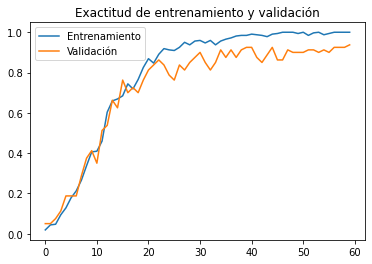

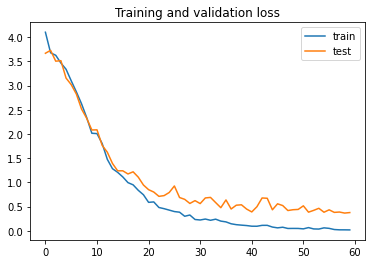

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

print(len(val_acc[-5:]))
print(np.mean(val_acc[-5:]))
print(np.std(val_acc[-5:]))


loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))


plt.plot(epochs, acc, label='Entrenamiento')
plt.plot(epochs, val_acc, label='Validación')
plt.title('Exactitud de entrenamiento y validación')
plt.legend()

plt.figure()


plt.plot(epochs, loss, label='Entrenamiento')
plt.plot(epochs, val_loss, label='Validación')
plt.title('Pérdidas de entrenamiento y validación')
plt.legend()

plt.show()

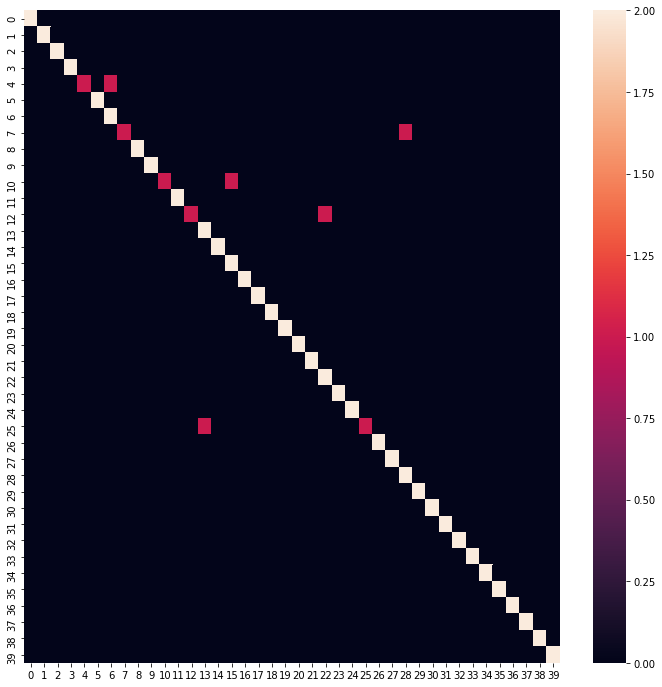

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)

cm=metrics.confusion_matrix(np.argmax(y_test, axis=1), y_pred)

plt.subplots(1, figsize=(12,12))
sns.heatmap(cm)

In [ ]:
print("Classification Results:\n{}".format(metrics.classification_report(np.argmax(y_test, axis=1), y_pred)))

### **3.1.2. Clasificadores no neuronales**

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

print("X_test shape:",X_test.shape)
print("y_test shape:{}".format(y_test.shape))

X_train shape: (320, 4096)
y_train shape:(320,)
X_test shape: (80, 4096)
y_test shape:(80,)


#### Configuración de los modelos a utilizar



In [ ]:
models=[]
models.append(("Logistic Regresion",LogisticRegression(max_iter=100)))
models.append(("Nayve Bayes",GaussianNB()))
models.append(("KNN",KNeighborsClassifier(n_neighbors=5)))
models.append(("CART",DecisionTreeClassifier()))
models.append(("SVM",SVC(kernel='linear')))
# Ensambles
models.append(('Random Forest',RandomForestClassifier(n_estimators = 400, random_state = 1)))
models.append(('Extra Trees',ExtraTreesClassifier()))

#### Evaluación mediante validación cruzada

In [ ]:
resultados = []
nombres = []

kfold = KFold(n_splits=5, random_state=0, shuffle= True)

for name, model in models:
    cv_resultados = cross_val_score(model, X, y, cv=kfold)
    resultados.append(cv_resultados)
    nombres.append(name)
    print("{}: {:,.3f} ({:,.3f})".format(name, cv_resultados.mean(), cv_resultados.std()))

Logistic Regresion: 0.957 (0.013)
Nayve Bayes: 0.825 (0.040)
KNN: 0.780 (0.048)
CART: 0.502 (0.076)
SVM: 0.975 (0.014)
Random Forest: 0.945 (0.024)
Extra Trees: 0.945 (0.017)


#### Visualización de resultados

In [ ]:
# Agregando los resultados de la ANN
resultados.append(val_acc[-5:])
nombres.append('ANN')

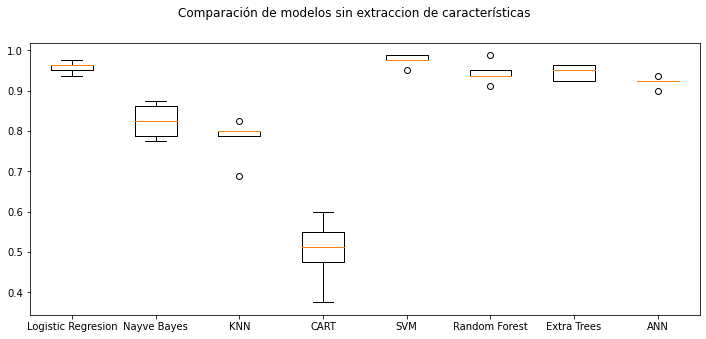

In [ ]:
fig = plt.figure(figsize=(12,5))
fig.suptitle('Comparación de modelos sin extraccion de características')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nombres)
plt.show()

## **3.2. Con extracción de características usando PCA**

### **3.2.1. Varianza Explicada y Eigenfaces de la aplicación de PCA**

#### `Varianza Explicada`

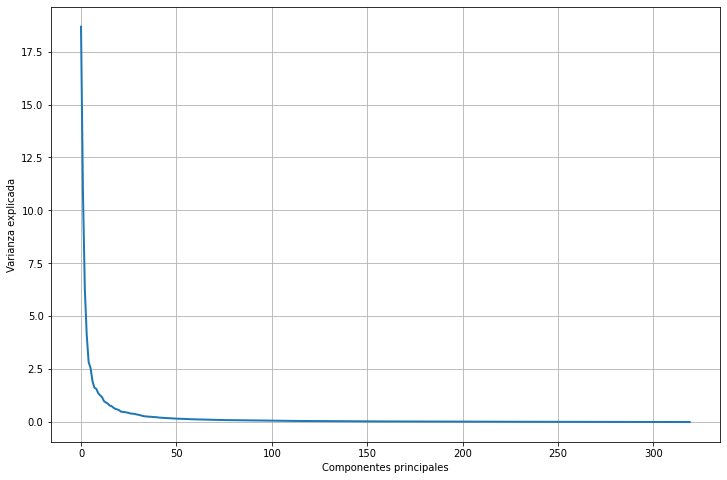

In [ ]:
pca=PCA()
pca.fit(X)

plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Componentes principales')
plt.ylabel('Varianza explicada')
plt.grid()
plt.show()

In [ ]:
print(np.sum(pca.explained_variance_[:100]))

74.56759


#### `Mostrando EigenFaces`

In [ ]:
n_components=100
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X)
X_train_pca=pca.transform(X)
print(X_train_pca.shape, y.shape)

In [ ]:
number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, 64, 64))

cols=10
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,20))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("Eigen Faces".format(10*"=", 10*"="))

### **3.2.2. ANN**

#### `División de la base de datos`

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("x_train: ",X_train.shape)
print("x_test: ",X_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

x_train:  (320, 4096)
x_test:  (80, 4096)
y_train shape:  (320, 40)
y_test shape:  (80, 40)


#### `Aplicacion de PCA para 100 componentes principales`

In [ ]:
n_components=100
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train)

X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)
print(X_train_pca.shape, y_train.shape)
print(X_test_pca.shape, y_test.shape)

(320, 100) (320, 40)
(80, 100) (80, 40)


#### `Creación del modelo neuronal`

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=100, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(40, activation = "softmax"))

model.compile(optimizer='adam' , loss = "categorical_crossentropy",  metrics=['acc'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 256)               25856     
_________________________________________________________________
dropout_16 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 40)                5160      
Total params: 63,912
Trainable params: 63,912
Non-trainable params: 0
_________________________________________________________________


In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#### `Enrenamiento del modelo`

In [ ]:
epochs = 25
batch_size = 10
history = model.fit(X_train_pca, y_train, validation_data=(X_test_pca,y_test), epochs=epochs, batch_size=batch_size, verbose = 2 )

#### `Visualización de los resultados`

5
0.9275000095367432
0.004999995231628418


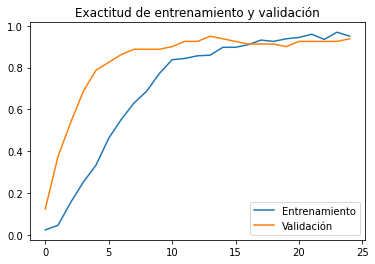

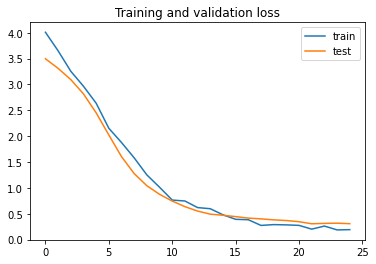

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

print(len(val_acc[-5:]))
print(np.mean(val_acc[-5:]))
print(np.std(val_acc[-5:]))

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Entrenamiento')
plt.plot(epochs, val_acc, label='Validación')
plt.title('Exactitud de entrenamiento y validación')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Entrenamiento')
plt.plot(epochs, val_loss, label='Validación')
plt.title('Pérdidas de entrenamiento y validación')
plt.legend()

plt.show()

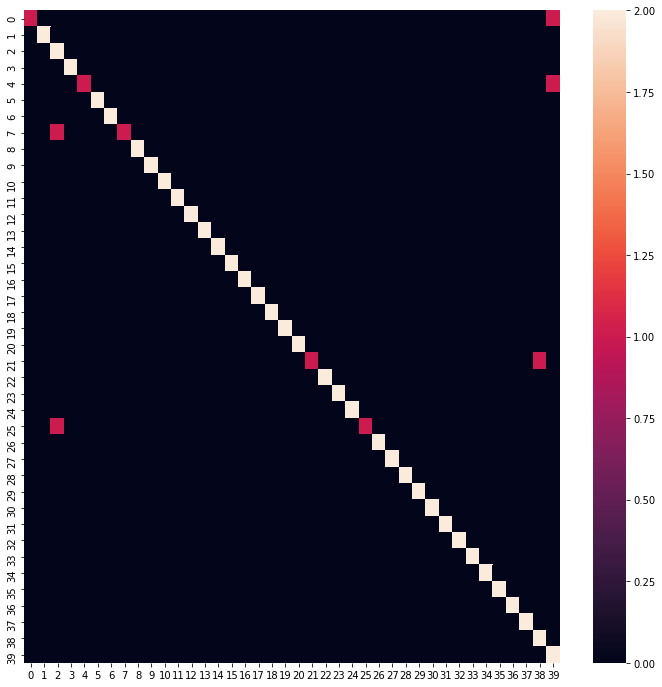

In [ ]:
y_pred = model.predict(X_test_pca)
y_pred = np.argmax(y_pred,axis=1)

cm=metrics.confusion_matrix(np.argmax(y_test, axis=1), y_pred)

plt.subplots(1, figsize=(12,12))
sns.heatmap(cm)

In [ ]:
print("Classification Results:\n{}".format(metrics.classification_report(np.argmax(y_test, axis=1), y_pred)))

### **3.2.2. Clasificadores no neuronales**

#### `Aplicación de PCA para obtención de 100 componente principales`

In [ ]:
n_components=100
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X)
X_train_pca=pca.transform(X)
print(X_train_pca.shape, y.shape)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

#### `Configuración de modelos a utilizar`


In [ ]:
models=[]
models.append(("Logistic Regresion",LogisticRegression(max_iter=100)))
models.append(("Nayve Bayes",GaussianNB()))
models.append(("KNN",KNeighborsClassifier(n_neighbors=5)))
models.append(("CART",DecisionTreeClassifier()))
models.append(("SVM",SVC(kernel='linear')))
# Ensambles
models.append(('Random Forest',RandomForestClassifier(n_estimators = 400, random_state = 1)))
models.append(('Extra Trees',ExtraTreesClassifier()))

#### `Evaluación mediante validación cruzada`

In [ ]:
resultados = []
nombres = []

kfold = KFold(n_splits=5, random_state=0, shuffle= True)

for name, model in models:
    cv_resultados = cross_val_score(model, X_train_pca, y, cv=kfold)
    resultados.append(cv_resultados)
    nombres.append(name)
    print("{}: {:,.3f} ({:,.3f})".format(name, cv_resultados.mean(), cv_resultados.std()))

LR: 0.932 (0.020)
NB: 0.770 (0.048)
KNN: 0.660 (0.047)
DT: 0.525 (0.057)
SVM: 0.927 (0.022)
Random Forest: 0.923 (0.005)
Extra Trees: 0.923 (0.020)


#### `Visualización de resultados`

In [ ]:
resultados.append(val_acc[-5:])
nombres.append('ANN')

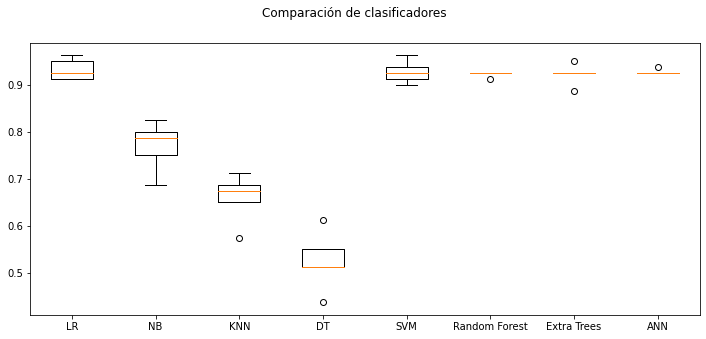

In [ ]:
fig = plt.figure(figsize=(12,5))
fig.suptitle('Comparación de clasificadores')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nombres)
plt.show()

## **3.3. Con extracción de características usando LDA**

### **3.3.1. Varianza explicada**

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
lda_var_ratios = lda.explained_variance_ratio_

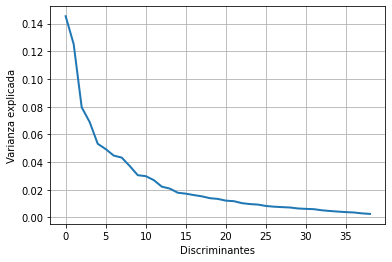

In [ ]:
# plt.plot(np.cumsum(lda_var_ratios), linewidth=2)
plt.plot(lda_var_ratios, linewidth=2)
 
plt.xlabel('Discriminantes')
plt.ylabel('Varianza explicada')
plt.grid()
plt.show()

In [ ]:
np.sum(lda_var_ratios[:20])

0.870602103055608

### **3.3.2. ANN**

#### `División de la base de datos`

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

print("x_train: ",X_train.shape)
print("x_test: ",X_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

x_train:  (320, 4096)
x_test:  (80, 4096)
y_train shape:  (320,)
y_test shape:  (80,)


#### `Aplicación de LDA para 20 discriminantes`

In [ ]:
n_components=20
lda=LinearDiscriminantAnalysis(n_components=n_components)
lda.fit(X_train, y_train)

X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

print(X_train_lda.shape, y_train.shape)
print(X_test_lda.shape, y_test.shape)

(320, 20) (320,)
(80, 20) (80,)


#### `Creación del modelo`

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=20, activation = "relu"))
model.add(Dropout(0.6))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(40, activation = "softmax"))

model.compile(optimizer='adam' , loss = "categorical_crossentropy",  metrics=['acc'])

model.summary()

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_131 (Dense)            (None, 256)               5376      
_________________________________________________________________
dropout_58 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_132 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_59 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_133 (Dense)            (None, 40)                5160      
Total params: 43,432
Trainable params: 43,432
Non-trainable params: 0
_________________________________________________________________


In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#### `Entrenamiento del modelo`

In [ ]:
epochs = 15
batch_size = 10
history = model.fit(X_train_lda, y_train_cat, validation_data=(X_test_lda,y_test_cat), epochs=epochs, batch_size=batch_size, verbose = 2 )

#### `Visualización de los resultados`

5
0.9775000214576721
0.004999995231628418


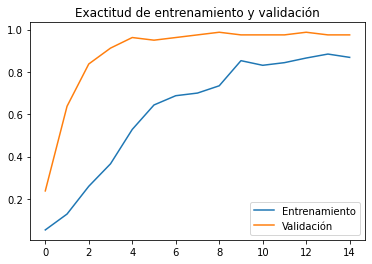

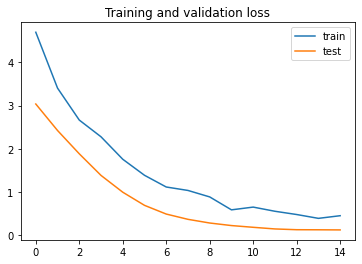

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

print(len(val_acc[-5:]))
print(np.mean(val_acc[-5:]))
print(np.std(val_acc[-5:]))

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Entrenamiento')
plt.plot(epochs, val_acc, label='Validación')
plt.title('Exactitud de entrenamiento y validación')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Entrenamiento')
plt.plot(epochs, val_loss, label='Validación')
plt.title('Pérdidas de entrenamiento y validación')
plt.legend()

plt.show()

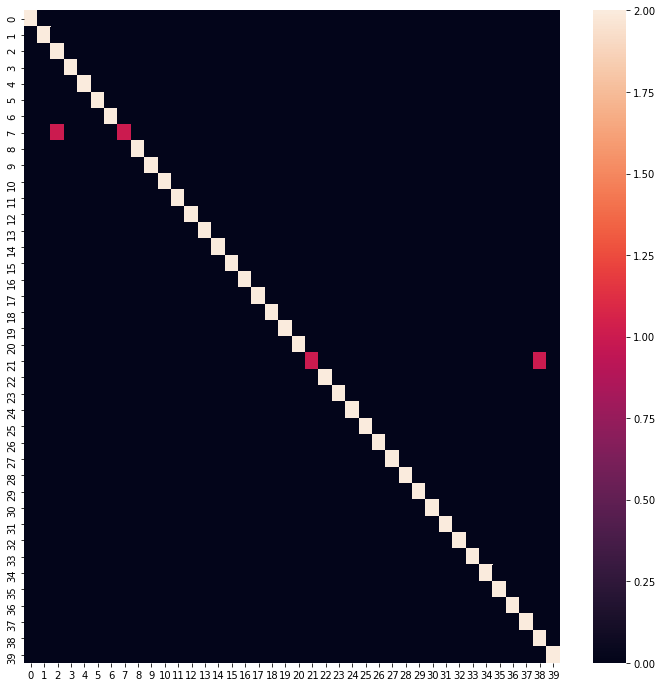

In [ ]:
y_pred = model.predict(X_test_lda)
y_pred = np.argmax(y_pred,axis=1)

cm=metrics.confusion_matrix(np.argmax(y_test_cat, axis=1), y_pred)

plt.subplots(1, figsize=(12,12))
sns.heatmap(cm)

In [ ]:
print("Classification Results:\n{}".format(metrics.classification_report(np.argmax(y_test_cat, axis=1), y_pred)))

### **3.3.3. Clasificadores no neuronales**

#### `Aplicación de LDA para 20 discriminantes`

In [ ]:
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit(X, y).transform(X)

#### `Configuración de modelos a utilizar`

In [ ]:
models=[]
models.append(("LR",LogisticRegression(max_iter=100)))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier(n_neighbors=5)))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC(kernel='linear')))
#
models.append(('Random Forest',RandomForestClassifier(n_estimators = 400, random_state = 1)))
models.append(('Extra Trees',ExtraTreesClassifier()))

#### `Evaluación mediante validación cruzada`

In [ ]:
resultados = []
nombres = []

kfold = KFold(n_splits=5, random_state=0, shuffle= True)

for name, model in models:
    cv_resultados = cross_val_score(model, X_train_lda, y, cv=kfold)
    resultados.append(cv_resultados)
    nombres.append(name)
    print("{}: {:,.3f} ({:,.3f})".format(name, cv_resultados.mean(), cv_resultados.std()))

LR: 1.000 (0.000)
NB: 0.990 (0.009)
KNN: 1.000 (0.000)
DT: 0.807 (0.067)
SVM: 1.000 (0.000)
Random Forest: 1.000 (0.000)
Extra Trees: 1.000 (0.000)


#### `Visualización de resultados`

In [ ]:
resultados.append(val_acc[-5:])
nombres.append('ANN')

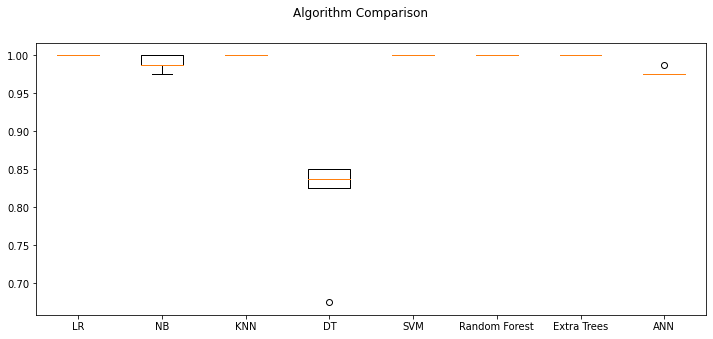

In [ ]:
fig = plt.figure(figsize=(12,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nombres)
plt.show()

## **3.4. Con extracción de características automatizado**

### **3.4.1. CONVOLUTIONAL NEURAL NETWORKS**

#### `División de la base de datos`



In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X_im, y, test_size=0.2, stratify=y, random_state=0)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train = X_train.reshape(-1,64,64,1)
x_test = X_test.reshape(-1,64,64,1)

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

x_train:  (320, 64, 64, 1)
x_test:  (80, 64, 64, 1)
y_train shape:  (320, 40)
y_test shape:  (80, 40)


#### `Creación del modelo`

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (7,7),padding = 'Same', 
                 activation ='relu', input_shape = (64,64,1)))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(40, activation = "softmax"))


model.compile(optimizer = 'adam' , loss = "categorical_crossentropy",  metrics=['mae','acc'])

model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 64, 64, 32)        1600      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_84 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 32, 32, 64)        51264     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_85 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 16, 16, 128)     

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#### `Entrenamiento del modelo`

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.7, 
                                            min_lr=0.00000000001)

epoch = 35
batch_size = 20

datagen = ImageDataGenerator(
        rotation_range=5,
        zoom_range = 0.05)
        
datagen.fit(x_train)

history = model.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                    epochs = epoch, 
                    validation_data = (x_test,y_test),
                    verbose = 2, 
                    steps_per_epoch=x_train.shape[0] // batch_size, 
                    callbacks=[learning_rate_reduction])

#### Visualización de los resultados

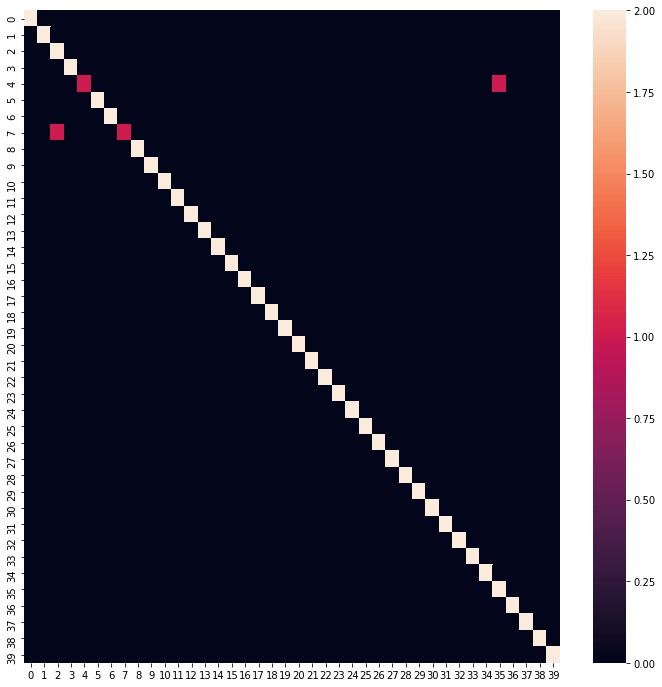

In [ ]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)

cm=metrics.confusion_matrix( np.argmax(y_test,axis=1), y_pred)

plt.subplots(1, figsize=(12,12))
sns.heatmap(cm)

In [ ]:
print("Classification Results:\n{}".format(metrics.classification_report( np.argmax(y_test,axis=1), y_pred)))

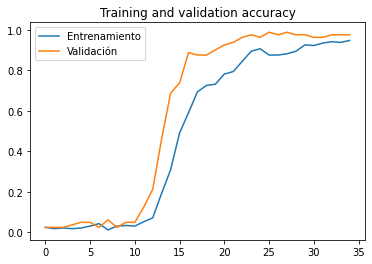

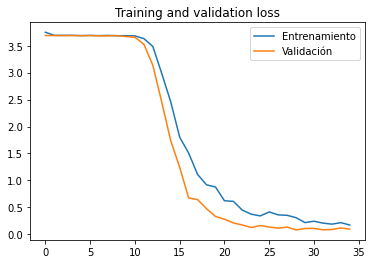

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))


plt.plot(epochs, acc, label='Entrenamiento')
plt.plot(epochs, val_acc, label='Validación')
plt.title('Exactitud de entrenamiento y validación')
plt.legend()

plt.figure()


plt.plot(epochs, loss, label='Entrenamiento')
plt.plot(epochs, val_loss, label='Validación')
plt.title('Pérdidas de entrenamiento y validación')
plt.legend()

plt.show()

In [ ]:
np.mean(val_acc[-5:])

0.9700000047683716

In [ ]:
np.std(val_acc[-5:])

0.0061237477171125045

### **3.4.2. VGG16 mediante transferencia de aprendizaje**

#### `Adecuación y división de la base de datos`

In [ ]:
X_im_3 = np.zeros((400, 64,64, 3))

for i, image in enumerate(X_im):
  X_im_3[i,:,:,0] = image
  X_im_3[i,:,:,1] = image
  X_im_3[i,:,:,2] = image

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X_im_3, y, test_size=0.2, stratify=y, random_state=0)

y_train = to_categorical(y_train, 40)
y_test = to_categorical(y_test, 40)

print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

print("X_test shape:",X_test.shape)
print("y_test shape:{}".format(y_test.shape))

X_train shape: (320, 64, 64, 3)
y_train shape:(320, 40)
X_test shape: (80, 64, 64, 3)
y_test shape:(80, 40)


#### `Creación del modelo`



> **Cargar base_model VGG16 preeentrenado**

In [ ]:
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(64,64,3))
base_model.trainable = False

> **Agregar top_model ANN**

In [ ]:
flat = Flatten()(base_model.output)
dense1 = Dense(256, activation = "relu")(flat)
drop1 = Dropout(0.3)(dense1)
dense2 = Dense(128, activation = "relu")(drop1)
drop2 = Dropout(0.3)(dense2)
out = Dense(40, activation = "softmax")(drop2)

transfer_model = Model(inputs=base_model.inputs, outputs=out)

transfer_model.summary()

Model: "model_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_28 (InputLayer)        [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0  

In [ ]:
transfer_model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["acc"])

In [ ]:
plot_model(transfer_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#### `Entrenamiento del modelo`

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.7, 
                                            min_lr=0.00000000001)

epoch = 30
batch_size = 20

datagen = ImageDataGenerator(
        rotation_range=5,
        zoom_range = 0.05)
        
datagen.fit(x_train)

# history = transfer_model.fit(X_train, y_train, batch_size = 20, epochs=30, validation_data=(X_test,y_test))

history = transfer_model.fit(datagen.flow(X_train,y_train, batch_size=batch_size),
                    epochs = epoch, 
                    validation_data = (X_test,y_test),
                    verbose = 2, 
                    steps_per_epoch=X_train.shape[0] // batch_size, 
                    callbacks=[learning_rate_reduction])

#### `Visualización de los resultados`

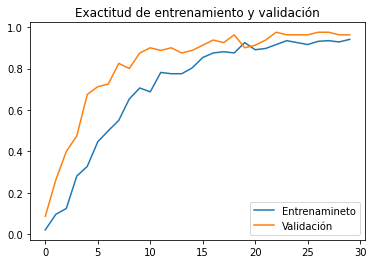

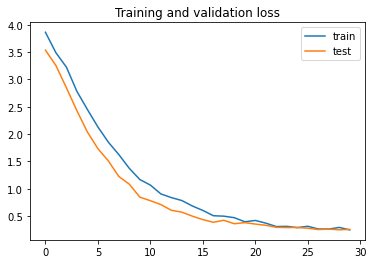

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']


loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))


plt.plot(epochs, acc, label='Entrenamineto')
plt.plot(epochs, val_acc, label='Validación')
plt.title('Exactitud de entrenamiento y validación')
plt.legend()

plt.figure()


plt.plot(epochs, loss, label='Entrenamineto')
plt.plot(epochs, val_loss, label='Validación')
plt.title('Exactitud de entrenamiento y validación')
plt.legend()

plt.show()

In [ ]:
np.mean(val_acc[-5:])

0.9674999952316284

In [ ]:
np.std(val_acc[-5:])

0.0061237477171125045

### **3.4.3. MovileNetV2 con transferencia de aprendizaje**

#### `Adecuación y división de la base de datos`

In [ ]:
X_im_3_upscale = np.zeros((400, 128,128, 3))

for i, image in enumerate(X_im):
  X_im_3_upscale[i,:,:,0] = cv2.resize(image, (128,128),interpolation=cv2.INTER_AREA)
  X_im_3_upscale[i,:,:,1] = cv2.resize(image, (128,128),interpolation=cv2.INTER_AREA)
  X_im_3_upscale[i,:,:,2] = cv2.resize(image, (128,128),interpolation=cv2.INTER_AREA)

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X_im_3_upscale, y, test_size=0.2, stratify=y, random_state=0)

y_train = to_categorical(y_train, 40)
y_test = to_categorical(y_test, 40)

print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

print("X_test shape:",X_test.shape)
print("y_test shape:{}".format(y_test.shape))

X_train shape: (320, 128, 128, 3)
y_train shape:(320, 40)
X_test shape: (80, 128, 128, 3)
y_test shape:(80, 40)


#### `Creación del modelo`

> **Cargar base_model MobileNetV2 preeentrenado**

In [ ]:
base_model2 = MobileNetV2(weights="imagenet", include_top=False, input_shape=(128,128,3))
base_model2.trainable = False ## Not trainable weights

> **Agregar top_model ANN**

In [ ]:
flat = Flatten()(base_model2.output)
dense1 = Dense(2056, activation = "relu")(flat)
drop1 = Dropout(0.1)(dense1)
dense2 = Dense(1024, activation = "relu")(drop1)
drop2 = Dropout(0.1)(dense2)
out = Dense(40, activation = "softmax")(drop2)

transfer_model = Model(inputs=base_model2.inputs, outputs=out)

In [ ]:
transfer_model.summary()

Model: "model_68"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_69 (InputLayer)           [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         input_69[0][0]                   
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 64, 64, 32)   0           bn_Conv1[0][0]                   
___________________________________________________________________________________________

In [ ]:
transfer_model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["acc"])

In [ ]:
# plot_model(transfer_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#### `Entrenamiento del modelo`

In [ ]:
history = transfer_model.fit(X_train, y_train, batch_size = 20, epochs=8, validation_data=(X_test,y_test))

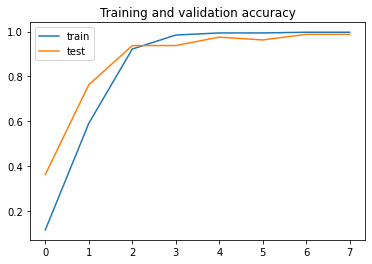

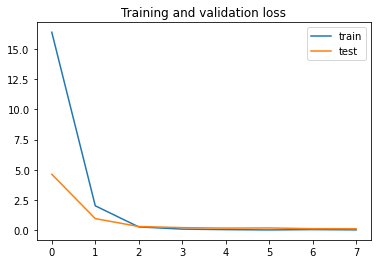

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Entrenamiento')
plt.plot(epochs, val_acc, label='Validación')
plt.title('Exactitud de entrenamiento y validación')
plt.legend()

plt.figure()


plt.plot(epochs, loss, label='Entrenamiento')
plt.plot(epochs, val_loss, label='Validación')
plt.title('Pérdidas de entrenamiento y validación')
plt.legend()

plt.show()

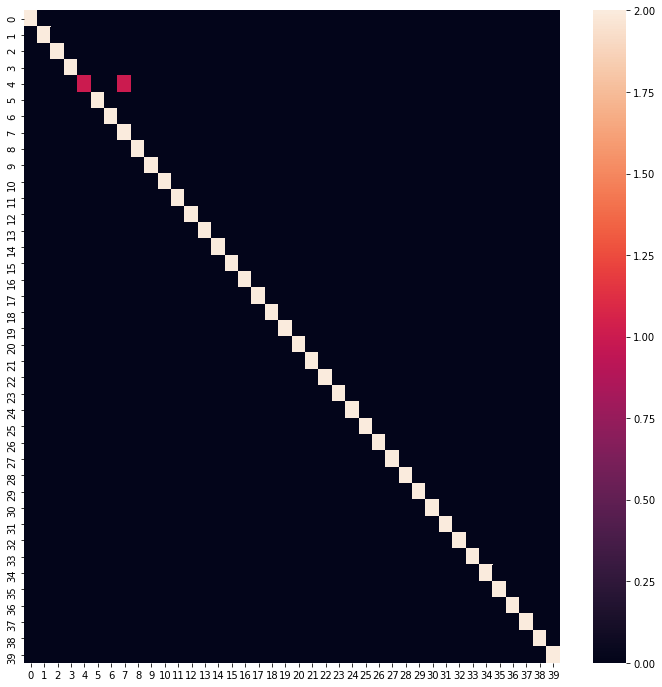

In [ ]:
y_pred = transfer_model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)

cm=metrics.confusion_matrix(np.argmax(y_test, axis=1), y_pred)

plt.subplots(1, figsize=(12,12))
sns.heatmap(cm)

In [ ]:
print("Classification Results:\n{}".format(metrics.classification_report(np.argmax(y_test, axis=1), y_pred)))

Classification Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       0.67      1.00      0.80         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
   

In [ ]:
np.mean(val_acc[-3:])

0.9791666666666666

In [ ]:
np.std(val_acc[-3:])

0.011785129878515196